<a href="https://colab.research.google.com/github/RachitBansal/AppliancePower_TimeSeries/blob/master/ARIMA_GreenD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
eq = input("Enter equipment: ")

test_y = np.load(file='./drive/My Drive/test_y'+eq+'.npy')
test_x = np.load(file='./drive/My Drive/test_x'+eq+'.npy')

Enter equipment: 3


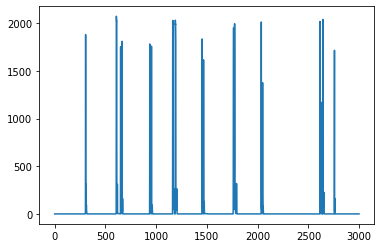

In [27]:
from pandas import datetime
import pandas as pd

# series = joblib.load("hour_resampled_data.pkl")
# sample = series
# sample = np.array(sample)
# sample = sample[3000:4500,1:2]

# series  = np.array(series)
# series = series[:3000,1:2]
# print(series.shape)
# series = pd.DataFrame(series)
# #series.drop(axis = "index")
# print(series.head())
# equipment = int(input('equipment: '))
series = test_x[:3000, 0]

plt.plot(series)
plt.show()

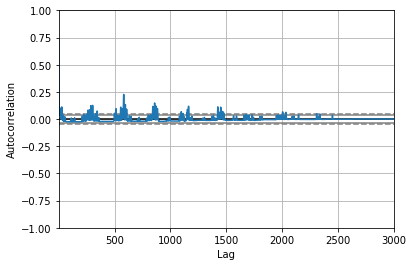

In [28]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -19191.377
Method:                       css-mle   S.D. of innovations            145.510
Date:                Tue, 24 Dec 2019   AIC                          38396.753
Time:                        08:29:43   BIC                          38438.796
Sample:                             1   HQIC                         38411.876
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.441e-16      1.681   2.64e-16      1.000      -3.295       3.295
ar.L1.D.y      0.1193      0.018      6.586      0.000       0.084       0.155
ar.L2.D.y     -0.3796      0.018    -21.061      0.0

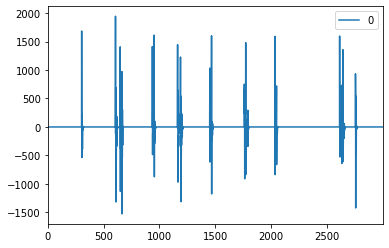

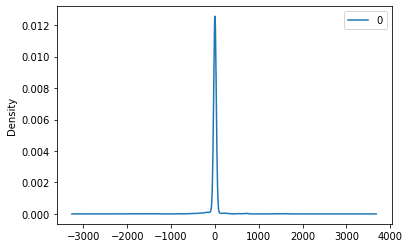

                  0
count  2.999000e+03
mean  -1.218762e-15
std    1.455346e+02
min   -1.527127e+03
25%   -7.022106e-16
50%   -7.021641e-16
75%   -7.021641e-16
max    1.944314e+03


In [29]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
series = np.array(series)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [0]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [0]:
# equipment = 3

In [0]:
history = []
for i in range(1000):
  history.append(test_x[i].reshape(-1))

In [33]:
print(history[0].shape)

(128,)


In [34]:
predictions = []
# history = [x for x in test_x[i].reshape(-1) for i in range(1000)]
for t in range(1000): 
    model = ARIMA(history[t], order=(5,1,0))
    try:
      model_fit = model.fit(disp=0)
    except:
      continue
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_y[t][0][0]
    history.append(obs)
    if(t%50==0):
        print('predicted=%f, expected=%f' % (yhat, obs))

predictions = np.array(predictions)
print(predictions.shape)
print(test_y.shape)
error = mean_squared_error(test_y[:1000].reshape(-1), predictions)
print('Test MSE: %.3f' % error)
print("RMSE : %.3f"%(np.sqrt(error)))
print("MAE : %.3f"%(mean_absolute_error(test_y[:1000].reshape(-1),predictions)))

# plot
pyplot.plot(test_y[:1000].reshape(-1))
pyplot.plot(predictions)

predicted=-0.000000, expected=0.000000
predicted=-0.000017, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.003743, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


predicted=0.001670, expected=0.000000
predicted=0.002113, expected=0.000000
predicted=-12.937693, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000000, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000000, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000000, expected=0.000000
predicted=2.894223, expected=2.806178
predicted=0.008236, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=-14.957288, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=-0.000006, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000000, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.000538, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:649: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.002156, expected=0.007177
predicted=-0.000000, expected=0.000000
predicted=-10.363454, expected=0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(990, 1)
(57126, 1, 1)


ValueError: ignored

In [35]:
len(predictions)

990

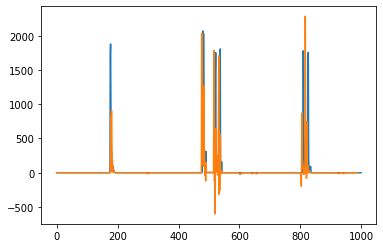

In [36]:
pyplot.plot(test_y[:1000].reshape(-1))
pyplot.plot(predictions)

In [0]:
np.save(arr = np.array(predictions), file = './drive/My Drive/arima_preds_1000_eq'+ eq +'.npy')

In [0]:
import time
t1 = time.time()
times = []
for t in range(50): 
    model = ARIMA(history[t], order=(5,1,0))
    model_fit = model.fit(disp=0)
    t1 = time.time()
    output = model_fit.forecast()
    t2 = time.time()
    times.append(t2-t1)
print(times)
print(sum(times))

[0.002229452133178711, 0.002145528793334961, 0.0022776126861572266, 0.0021119117736816406, 0.0020639896392822266, 0.0021719932556152344, 0.002135753631591797, 0.0022683143615722656, 0.0020749568939208984, 0.002238035202026367, 0.0021359920501708984, 0.002263784408569336, 0.0021483898162841797, 0.002351522445678711, 0.0020711421966552734, 0.0020694732666015625, 0.0021843910217285156, 0.0021543502807617188, 0.0020427703857421875, 0.0022361278533935547, 0.0021584033966064453, 0.002172708511352539, 0.0022726058959960938, 0.0019328594207763672, 0.0020842552185058594, 0.0019707679748535156, 0.0021820068359375, 0.0022058486938476562, 0.002017974853515625, 0.0020842552185058594, 0.0018773078918457031, 0.002106904983520508, 0.0020961761474609375, 0.0020842552185058594, 0.0021736621856689453, 0.001996278762817383, 0.0021402835845947266, 0.0023005008697509766, 0.002201080322265625, 0.002312183380126953, 0.0021886825561523438, 0.002158641815185547, 0.002132892608642578, 0.0021398067474365234, 0.00

In [0]:
def mean_abs_pct_error(actual_values, forecast_values):

    err=0
    actual_values = pd.DataFrame(actual_values)
    forecast_values = pd.DataFrame(forecast_values)
    for i in range(len(forecast_values)):

        err += np.abs(actual_values.values[i] - forecast_values.values[i])/actual_values.values[i]

    return err[0] * 100/len(forecast_values) 

mean_abs_pct_error(test,predictions)

NameError: ignored